<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Dependencies" data-toc-modified-id="Importing-Dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Dependencies</a></span></li><li><span><a href="#Preparing-Dataset" data-toc-modified-id="Preparing-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing Dataset</a></span><ul class="toc-item"><li><span><a href="#Combine-text-files-into-single-files-and-pickle-it-for-later-use" data-toc-modified-id="Combine-text-files-into-single-files-and-pickle-it-for-later-use-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Combine text files into single files and pickle it for later use</a></span><ul class="toc-item"><li><span><a href="#Combining-individual-text-files-to-a-single-text-file" data-toc-modified-id="Combining-individual-text-files-to-a-single-text-file-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Combining individual text files to a single text file</a></span></li><li><span><a href="#Dump-the-directory-for-reference" data-toc-modified-id="Dump-the-directory-for-reference-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Dump the directory for reference</a></span></li></ul></li></ul></li><li><span><a href="#Text-Preprocessing" data-toc-modified-id="Text-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Text Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Dump-the-Preprocessed-Data" data-toc-modified-id="Dump-the-Preprocessed-Data-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Dump the Preprocessed Data</a></span></li><li><span><a href="#Load-the-Preprocessed-files" data-toc-modified-id="Load-the-Preprocessed-files-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Load the Preprocessed files</a></span></li></ul></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Create-Dataset-and-DataLoader" data-toc-modified-id="Create-Dataset-and-DataLoader-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Create Dataset and DataLoader</a></span></li></ul></li><li><span><a href="#Create-Classification-model" data-toc-modified-id="Create-Classification-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create Classification model</a></span><ul class="toc-item"><li><span><a href="#Training-iteration" data-toc-modified-id="Training-iteration-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Training iteration</a></span><ul class="toc-item"><li><span><a href="#Train-Function" data-toc-modified-id="Train-Function-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Train Function</a></span></li><li><span><a href="#Evaluaton-Function" data-toc-modified-id="Evaluaton-Function-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Evaluaton Function</a></span></li><li><span><a href="#Training-loop" data-toc-modified-id="Training-loop-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Training loop</a></span></li></ul></li></ul></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluate the model</a></span></li><li><span><a href="#Vistualize-Result" data-toc-modified-id="Vistualize-Result-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Vistualize Result</a></span></li><li><span><a href="#Predict-Raw-Text" data-toc-modified-id="Predict-Raw-Text-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predict Raw Text</a></span></li></ul></div>

## Importing Dependencies

In [1]:
import transformers
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup


import torch
from torch.utils import data
import torch.nn as nn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set(style = 'whitegrid')

## Preparing Dataset

In [4]:
from pathlib import Path
import pickle 

### Combine text files into single files and pickle it for later use

#### Combining individual text files to a single text file


In [5]:
# def combining_text_files(directory):
#     for dir_ in directory:
#         current_directory = Path(dir_)
#         txt_files = current_directory.rglob('*.txt')
#         files_directory = [lines.__str__() for lines in current_directory.rglob('*.txt')]
#         files = [str(lines.read_bytes(), 'UTF-8') for lines in current_directory.rglob('*.txt')]
#         yield files_directory, files

In [6]:
# main_directory = Path.cwd()/'Dataset'/'aclImdb'
# folder_directory = [Path(main_directory)/case/label for case in ['train','test'] for label in ['pos','neg']]
# (train_pos_directory, train_pos), (train_neg_directory, train_neg), (test_pos_directory, test_pos), (test_neg_directory, test_neg) = combining_text_files(folder_directory)

#### Dump the directory for reference

In [7]:
# with open('train_pos_directory.txt','wb') as f:
#     pickle.dump(train_pos_directory, f)
# 
# with open('train_neg_directory.txt','wb') as f:
#     pickle.dump(train_neg_directory, f)
# 
# with open('test_pos_directory.txt','wb') as f:
#     pickle.dump(test_pos_directory, f)
# 
# with open('test_neg_directory.txt','wb') as f:
#     pickle.dump(test_neg_directory, f)

## Text Preprocessing

### Data Cleaning

In [8]:
# import re

In [9]:
# def text_preproc(list_text):
#     for text in list_text:
#         #Remove html tags
#         text = [re.sub(r'<[^>]+>', ' ', lines) for lines in text]
        
#         #Remove non letters charaters
#         text = [re.sub(r'[^A-Za-z]',' ',lines) for lines in text]
        
#         #Remove * and . 
#         text = [re.sub(r'[*.]', '', lines) for lines in text]
#         #Remove excessive whitespace
#         text = [re.sub(r'\s+', ' ', lines) for lines in text]
#         yield text

In [10]:
# train_pos,train_neg,test_pos,test_neg = text_preproc([train_pos,train_neg,test_pos,test_neg])

#### Dump the Preprocessed Data

In [11]:
# with open('train_pos.txt','wb') as f:
#      pickle.dump(train_pos, f)
# with open('train_neg.txt','wb') as f:
#      pickle.dump(train_neg, f)
# with open('test_pos.txt','wb') as f:
#      pickle.dump(test_pos, f)
# with open('test_neg.txt','wb' )as f:
#      pickle.dump(test_neg, f)

#### Load the Preprocessed files

In [12]:
# Opening the text files 
with open('train_pos.txt','rb') as f:
    train_pos = pickle.load(f)
    
with open('train_neg.txt','rb') as f:
    train_neg = pickle.load(f)
    
with open('test_pos.txt','rb') as f:
    test_pos = pickle.load(f)
    
with open('test_neg.txt','rb' )as f:
    test_neg = pickle.load(f)

In [13]:
train_data = train_pos + train_neg
test_data = test_pos + test_neg

In [14]:
# 1 for positive review and 0 for negative review
train_label = [1]*len(train_pos)+[0]*len(train_neg)
test_label = [1]*len(test_pos)+[0]*len(test_neg)

In [15]:
train_df = pd.DataFrame({'reviews' : train_data,
                         'label' : train_label}
                       )
test_df = pd.DataFrame({'reviews' : test_data,
                        'label' : test_label}
                      )

In [16]:
val_df, test_df = train_test_split(test_df,
                                   train_size = 0.5
                                  )

### Tokenization

Since we have large corpus, we will split them into chuck of 300 words each with the first 50 words overlapped 

Generally, bert model can support max_length up to 512 tokens


In [17]:
Tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)

In [18]:
def split_large_corpus(text):
    text_total= []
    text = text.split()
    no_list_split = 1 if (len(text)-300)//250 < 0 else (len(text)-300)//250+2
    for no in range(no_list_split):
        text_total.append(' '.join(text[no*250:no*250+300]))
    return text_total

In [19]:
train_df.reviews = train_df.reviews.apply(split_large_corpus)
val_df.reviews = val_df.reviews.apply(split_large_corpus)
test_df.reviews = test_df.reviews.apply(split_large_corpus)

### Create Dataset and DataLoader

 function__call__ will return 3 outputs:
1. input_ids : list of token ids
2. token_type_ids : 0 for odd sentence; 1 for even sentence
3. attention_mask : 1 for tokens to be have attention ; 0 for the padded values

In [20]:
# def tokenize_padding_text(train_data):
#     input_ids = []
#     for sent in train_data:
#         encoded_sent = Tokenizer.__call__(sent,
#                                           add_special_tokens = True,
#                                           max_length = 500,
#                                           padding = 'max_length',
#                                           truncation = True,
#                                           return_attention_mask = True,
#                                           is_split_into_words=True,
#                                           return_token_type_ids = False,
#                                           return_tensors = 'pt'
#                                           )
#         input_ids.append(encoded_sent)
#     return input_ids

In [21]:
# train_data_tokenized_padded = list(map(tokenize_padding_text,train_df.reviews))

In [22]:
MAX_LEN = 500 
BATCH_SIZE = 2 
EPOCH = 5
DROPOUT = 0.2
NB_CLASSES = 2

In [23]:
# Create Dataset
class create_movie_dataset(data.Dataset):
    def __init__ (self, reviews, label, tokenizer, MAX_LEN):
        self.reviews = reviews
        self.label = label
        self.tokenizer = tokenizer
        self.max_len = MAX_LEN
    
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, item):
        reviews = str(self.reviews[item])
        label = self.label[item]
        encoded_sent = self.tokenizer.__call__(reviews,
                                              add_special_tokens = True,
                                              max_length = self.max_len,
                                              padding = 'max_length',
                                              truncation = True,
                                              return_attention_mask = True,
                                              is_split_into_words=True,
                                              return_token_type_ids = False,
                                              return_tensors = 'pt'
                                          )
        return{'reviews' : reviews,
               'input_ids':encoded_sent['input_ids'].flatten(),
               'attention_mask':encoded_sent['attention_mask'].flatten(),
               'label':torch.tensor(label)
                }

In [24]:
#Create Dataloader
def create_data_loader(reviews, label, tokenizer, MAX_LEN, BATCH_SIZE):
    ds = create_movie_dataset(reviews = reviews.to_numpy(), label = label.to_numpy(), tokenizer = tokenizer, MAX_LEN = MAX_LEN)
    return data.DataLoader(ds,
                           batch_size = BATCH_SIZE,
                           shuffle = True
                           )

In [25]:
train_dataloader = create_data_loader(train_df.reviews, train_df.label, Tokenizer, MAX_LEN, BATCH_SIZE)
val_dataloader = create_data_loader(val_df.reviews, val_df.label, Tokenizer, MAX_LEN, BATCH_SIZE)
test_dataloader = create_data_loader(test_df .reviews, test_df.label, Tokenizer, MAX_LEN, BATCH_SIZE)

## Create Classification model

In [26]:
# # An additional layer required for pooling the output at the last layer of the model 
# last_hidden_layer, pooled_output = bertmodel(input_ids = train_data_tokenized_padded[1][0]['input_ids'],
#                                              attention_mask = train_data_tokenized_padded[1][0]['attention_mask']
#                                             )
# print(f'last_hidden_layer= {last_hidden_layer.shape}, pooled_output = {pooled_output.shape}')

In [27]:
class sentiment_classification(nn.Module):
    def __init__ (self, dropout = DROPOUT, nb_classes = NB_CLASSES):
        super(sentiment_classification, self).__init__()
        self.bertmodel = BertModel.from_pretrained('bert-base-uncased')
        self.drop = nn.Dropout(p = DROPOUT)
        self.sigmoid = nn.Sigmoid()
        if nb_classes >2: 
            self.out = nn.Linear(self.bertmodel.config.hidden_size, nb_classes) #last layer for the transfer learning
        if nb_classes == 2:
            self.out = nn.Linear(self.bertmodel.config.hidden_size, 1)
    def forward(self, input_ids, attention_mask):
        _ , pooled_output = self.bertmodel(input_ids = input_ids,
                                           attention_mask = attention_mask)
        output = self.drop(pooled_output)
        output = self.out(output)
        output = self.sigmoid(output)
        return output

In [28]:
# Initialize the model
model = sentiment_classification()

# Send the model to gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

sentiment_classification(
  (bertmodel): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

Scheduler : Create a schedule with a learning rate that decreases linearly from the initial lr set in the optimizer to 0, after a warmup period during which it increases linearly from 0 to the initial lr set in the optimizer.


In [29]:
ADAM_LR_RATE = 2e-5 #default = 1e-3
num_warmup_step = 0 
num_training_steps = len(train_dataloader)*EPOCH

In [30]:
#loss_fn
loss_fn = torch.nn.BCELoss().to(device)

#optimizer
optimizer = AdamW(model.parameters(), 
                  lr = ADAM_LR_RATE,
                  correct_bias = False,
                  betas = (0.9,0.99)
                 )

# scheduler (warmup): for highly differentiated dataset to prevent early over-fitting and skewness 
# https://stackoverflow.com/questions/55933867/what-does-learning-rate-warm-up-mean
schedule = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps= 0,
                                           num_training_steps = num_training_steps)


### Training iteration 

#### Train Function 

In [31]:
def train_fn(model, dataloader, device, loss_fn, optimizer, schedule, n_train):
    
    # Set model to training mode
    model = model.train()
    
    # For calculating loss
    loss_batch =[]
    correct_prediction = 0
    #count = 0
    for data in dataloader:
        #if count != 0:
        #    break
        #count += 1
        # Send item from dataloader to gpu
        input_ids  = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        label = data['label'].float().unsqueeze(1).to(device)
        
        optimizer.zero_grad()
        
        #output 
        output = model(input_ids = input_ids,
                       attention_mask = attention_mask
                      )
        
        pred = torch.Tensor([[1] if output_ >= 0.5 else [0] for output_ in output]).to(device)

        #print(f'output = {output}')
        #print(f'pred = {pred}')
        #print(f'label = {label}')
        #print(f'sum: {torch.sum(pred == label)}')
        # loss
        loss = loss_fn(output,label)
        correct_prediction += torch.sum(pred == label) ## record the correct prediction of the currect batch
        #print(correct_prediction)
        loss_batch.append(loss.item()) ## record loss of the current batch
        loss.backward() ## backpropagation 
        nn.utils.clip_grad_norm_(model.parameters(), max_norm = 1.0)
        
        optimizer.step()
        schedule.step()
        
    return correct_prediction/n_train, np.mean(loss_batch)

#### Evaluaton Function


In [32]:
def eval_fn(model, dataloader, device, loss_fn, n_eval):
    
    #Set model to evaluation mode
    model = model.eval()
    
    #For calculating losses
    loss_batch = []
    correct_prediction = 0
    #count = 0

    with torch.no_grad():
        for data in dataloader:
            #if count != 0:
            #    break
            #count += 1
            #Sent item from dataloader to GPU
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            label = data['label'].float().unsqueeze(1).to(device)
            
            output = model(input_ids,
                           attention_mask)
            pred = torch.Tensor([[1] if output_ >= 0.5 else [0] for output_ in output]).to(device)
            #print(f'output = {output}')
            #print(f'pred = {pred}')
            #print(f'label = {label}')
            
            loss = loss_fn(output, label)
            correct_prediction += torch.sum(pred == label)
            loss_batch.append(loss.item())
            
    return correct_prediction/n_eval, np.mean(loss_batch)

#### Training loop

In [33]:
import time 

In [34]:
%%time

history_epoch = defaultdict(list)
best_acc = 0
total_time = time.time()
for epoch in range(EPOCH):
    start_train_time = time.time()
    print(f'Epoch: {epoch+1}/{EPOCH}')
    print('-'*20)
    train_acc, train_loss = train_fn(model,
                                     train_dataloader,
                                     device,
                                     loss_fn,
                                     optimizer,
                                     schedule,
                                     len(train_df)
                                     )
    end_train_time = time.time()
    print(f'Train_accuracy = {train_acc}, Train_loss = {train_loss}')
    #print(f'Time for train = {end_train_time - start_train_time } seconds')
    print()
    eval_acc, eval_loss = eval_fn(model,
                                  val_dataloader,
                                  device,
                                  loss_fn,
                                  len(val_df)
                                  )
    print(f'Eval_accuracy = {eval_acc}, Eval_loss = {eval_loss}')
    #print(f'Time for eval = {time.time() -  end_train_time }')
    print()
    history_epoch['train_acc'].append([train_acc])
    history_epoch['train_loss'].append([train_loss])
    history_epoch['eval_acc'].append([eval_acc])
    history_epoch['eval_loss'].append([eval_loss])
    print(f'Time for this epoch = {time.time() - start_train_time} seconds')
    print('='*20,'\n\n')
    if eval_acc > best_acc: 
        torch.save(model.state_dict(), 'movie_sentimental_classification_pytorch.pt')
        best_acc = eval_acc
    

print(f'Total time {time.time() - total_time} seconds')
print(f'Best Accuracy = {best_acc}')

Epoch: 1/5
--------------------
Train_accuracy = 0.8936399817466736, Train_loss = 0.4766843391557492

Eval_accuracy = 0.8998399972915649, Eval_loss = 0.5922463955428684

Time for this epoch = 3409.770713329315 seconds


Epoch: 2/5
--------------------
Train_accuracy = 0.9537599682807922, Train_loss = 0.2583874168983172

Eval_accuracy = 0.9285599589347839, Eval_loss = 0.4460175101652462

Time for this epoch = 3421.098108291626 seconds


Epoch: 3/5
--------------------
Train_accuracy = 0.9837999939918518, Train_loss = 0.10832869955700182

Eval_accuracy = 0.9287199974060059, Eval_loss = 0.5213236451704975

Time for this epoch = 3357.166345834732 seconds


Epoch: 4/5
--------------------
Train_accuracy = 0.9955199956893921, Train_loss = 0.036336484515026024

Eval_accuracy = 0.91839998960495, Eval_loss = 0.8212861524059432

Time for this epoch = 3355.6257185935974 seconds


Epoch: 5/5
--------------------
Train_accuracy = 0.9983599781990051, Train_loss = 0.015098367943884541

Eval_accuracy 

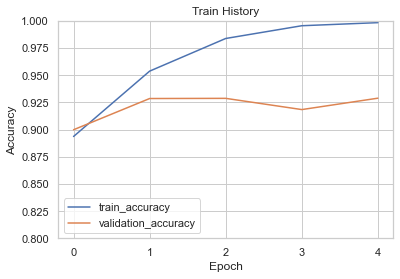

In [35]:
plt.plot(history_epoch['train_acc'], label = 'train_accuracy')
plt.plot(history_epoch['eval_acc'],  label = 'validation_accuracy')
plt.title('Train History')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.xticks((0,1,2,3,4))
plt.legend()
plt.show()


## Evaluate the model

In [36]:
checkpoint= torch.load('movie_sentimental_classification_pytorch.pt', map_location=device)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [37]:
def test_fn(model, dataloader, device):
    
    #Set model to evaluation mode
    model = model.eval()
    review_list = []
    prediction_list = []
    prediction_prob_list = []
    label_list = []
    #count = 0

    with torch.no_grad():
        for data in dataloader:
            
            #if count == 2:
            #    break
            #count += 1
            
            #Sent item from dataloader to GPU
            text = data['reviews']
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            label = data['label'].float().unsqueeze(1).to(device)
            
            output = model(input_ids,
                           attention_mask)
            pred = torch.Tensor([[1] if output_ >= 0.5 else [0] for output_ in output]).to(device)
            #print(f'output = {output}')
            #print(f'pred = {pred}')
            #print(f'label = {label}')
            
            review_list.extend(text)
            prediction_list.extend(pred)
            prediction_prob_list.extend(output)
            label_list.extend(label)
        
        prediction_list = torch.stack(prediction_list).cpu()
        label_list = torch.stack(label_list).cpu()
        prediction_prob_list = torch.stack(prediction_prob_list).cpu()
    return review_list, prediction_list, prediction_prob_list, label_list

In [38]:
y_review, y_pred, y_pred_prob, y_label = test_fn(model,
                                                test_dataloader,
                                                device
                                                )

## Vistualize Result

In [39]:
class_name = ['Negative','Positive']

In [40]:
print(classification_report(y_pred, y_label, target_names = class_name))

              precision    recall  f1-score   support

    Negative       0.93      0.93      0.93      6286
    Positive       0.93      0.93      0.93      6214

    accuracy                           0.93     12500
   macro avg       0.93      0.93      0.93     12500
weighted avg       0.93      0.93      0.93     12500



<div class="alert alert-block alert-success">
<b>Final Accuracy</b> 
    
    
Based on the test data, our model has around 93% accuracy.<br>
Performance may enhance if train-val-test ratio change to 60-20-20 or even 70-15-15
</div>

Text(0.5, 12.453125, 'Predicted sentiment')

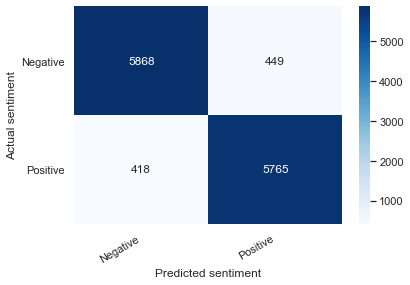

In [41]:
cm = confusion_matrix(y_label, y_pred)
df_cm = pd.DataFrame(cm, index = class_name, columns = class_name)
hmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")

hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment')

## Predict Raw Text

In [50]:
example = 'I hate this moive'

In [51]:
encoded_sent = Tokenizer.__call__(example,
                                  add_special_tokens = True,
                                  max_length = MAX_LEN,
                                  padding = 'max_length',
                                  truncation = True,
                                  return_attention_mask = True,
                                  is_split_into_words=True,
                                  return_token_type_ids = False,
                                  return_tensors = 'pt'
                                )
output = model(encoded_sent['input_ids'].to(device),encoded_sent['attention_mask'].to(device))
prediction = 'Positive' if output >= 0.5 else 'Negative'

In [52]:
output

tensor([[5.4340e-06]], device='cuda:0', grad_fn=<SigmoidBackward>)

In [53]:
if output.item()<0.5:
    output =(0.5-output.item())/0.5
else: 
    output =(output.item()-0.5)/0.5
print(f'Text: {example}\nPrediction: {prediction}, confidence = {output}')
prediction

Text: I hate this moive
Prediction: Negative, confidence = 0.9999891319248491


'Negative'